---
# Week 5 HW
<span  style="color:purple; font-size:20px">
Systems & Technologies: Python  
Week 5
</span>

---

## Mass Shootings in the USA

The `../data-sets/mass_shooting/` folder contains two tables with information about all of the mass-shootings in the USA in 2018 and 2019 (as of 8/31/19). In the following exercises you will explore these data using the techniques you have learned this week.

In [355]:
# Load libraries and specify useful notebook arguments

import pandas as pd
%matplotlib inline
pd.set_option('display.max_colwidth', -1)

C:\Users\malab\AppData\Local\Temp\ipykernel_2092\920918690.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [356]:
# Load data

shooting_2018 = pd.read_csv(r'C:\Users\malab\OneDrive\Documents\Systems and Technologies; Python\ST-Python 64502\ST-Python 64502\notebooks/data-sets/mass_shooting/2018_mass_shootings.csv')
shooting_2018.head()

,Date,Location,Dead,Injured,Total,Description
0,"December 31, 2018","Cleveland, Ohio",3,2,5,A dispute began at a rented Airbnb during a New Year's Eve party. Three men were killed and another man and woman were wounded.[11]
1,"December 29, 2018","Lima, Ohio",1,3,4,One person was killed and three people were wounded in a shooting at an after hours club.[12]
2,"December 28, 2018","St. Charles, Missouri",4,1[n 1],6,"A gunman shot and killed his girlfriend, her two children, and her mother. He was arrested after exchanging fire with police and attempting to carjack a vehicle.[13]"
3,"December 24, 2018","Lutcher, Louisiana",2,2,4,Three people were killed and two others were wounded in a shooting outside of a bar.[14]
4,"December 23, 2018","Springfield, Missouri",0,7,7,Seven people were wounded during a shooting at a holiday party.[15]


In [357]:
# Load data

shooting_2019 = pd.read_csv(r'C:\Users\malab\OneDrive\Documents\Systems and Technologies; Python\ST-Python 64502\ST-Python 64502\notebooks/data-sets/mass_shooting/2019_mass_shootings.csv')
shooting_2019.head()

,Date,Location,Dead,Injured,Total,Description
0,"January 1, 2019","Columbia, South Carolina",0,5,5,Five people were shot and wounded outside of a nightclub around 6am local time.[316]
1,"January 1, 2019","Tallahassee, Florida",0,5,5,Five people were shot and wounded around 3am local time at the University Village Shopping Center.[317]
2,"January 2, 2019","Jonesboro, Arkansas",1,3,4,A 16-year-old boy was killed and three others were wounded during a home invasion.[315]
3,"January 3, 2019","Texas City, Texas",3,1,4,Three children under the age of six were found deceased along with a wounded woman in an apparent home invasion.[314]
4,"January 4, 2019","Hurt, Virginia",3[n 1],2,5,A man killed his wife and son in their home and injured two people who were inside a vehicle before killing himself.[311]


### Problem 1: (5 points)

<span  style="color:purple; font-size:16px">Create a single DataFrame `shootings` by stacking the 2018 and 2019 mass shooting data and reseting the index. As of August 31, 2019, how many mass shootings were there in the US in 2018 and 2019?</span>

In [358]:
# Answer
shootings = pd.concat([shooting_2018, shooting_2019],
            axis = 'index',
            ignore_index = True)
shootings.shape[0]

# There were 620 mass shootings in the US in 2018 and 2019. 

620

### Problem 2: (5 points)

<span  style="color:purple; font-size:16px">Create a new DataFrame `locations` by splitting the `Location` into two columns: `City` and `State`.</span>

In [359]:
# Answer

locations = shootings['Location'].str.split(',',expand=True)
locations = locations.rename(columns={0:"City",1:"State"})
locations

,City,State
0,Cleveland,Ohio
1,Lima,Ohio
2,St. Charles,Missouri
3,Lutcher,Louisiana
4,Springfield,Missouri
...,...,...
615,Mobile,Alabama
616,Baltimore,Maryland
617,Odessa and Midland,Texas
618,Charlotte,North Carolina


### Problem 3: (5 points)

<span  style="color:purple; font-size:16px">Use the appropriate methods to add `locations` to `shootings` and drop the `Location` column.</span>

In [360]:
# Answer

shootings = pd.concat([locations, shootings],
            axis = 'columns',
            join = 'outer')
shootings.drop(columns = 'Location', inplace = True)
shootings.head(5)

,City,State,Date,Dead,Injured,Total,Description
0,Cleveland,Ohio,"December 31, 2018",3,2,5,A dispute began at a rented Airbnb during a New Year's Eve party. Three men were killed and another man and woman were wounded.[11]
1,Lima,Ohio,"December 29, 2018",1,3,4,One person was killed and three people were wounded in a shooting at an after hours club.[12]
2,St. Charles,Missouri,"December 28, 2018",4,1[n 1],6,"A gunman shot and killed his girlfriend, her two children, and her mother. He was arrested after exchanging fire with police and attempting to carjack a vehicle.[13]"
3,Lutcher,Louisiana,"December 24, 2018",2,2,4,Three people were killed and two others were wounded in a shooting outside of a bar.[14]
4,Springfield,Missouri,"December 23, 2018",0,7,7,Seven people were wounded during a shooting at a holiday party.[15]


### Problem 4: (5 points)

<span  style="color:purple; font-size:16px">Load the `../data-sets/territory_abbr.csv` data as `abbr`. Attempt to merge `abbr` with `shootings` (on the `State` column) to create `shootings_bad`, a DataFrame with a new column `Abbreviation`, using the appropriate join. Examine the results. What problem do you see in the resulting table?</span>

In [361]:
# Answer

abbr = pd.read_csv(r'C:\Users\malab\OneDrive\Documents\Systems and Technologies; Python\ST-Python 64502\ST-Python 64502\notebooks/data-sets/territory_abbr.csv')
abbr.head()

shootings_bad = abbr.merge(shootings, 
                           how = 'right', 
                           on = 'State')
shootings_bad

# I see that when we merged, many of the abbreviations for the states did not populate.

,State,Abbreviation,City,Date,Dead,Injured,Total,Description
0,Ohio,NaN,Cleveland,"December 31, 2018",3,2,5,A dispute began at a rented Airbnb during a New Year's Eve party. Three men were killed and another man and woman were wounded.[11]
1,Ohio,NaN,Lima,"December 29, 2018",1,3,4,One person was killed and three people were wounded in a shooting at an after hours club.[12]
2,Missouri,NaN,St. Charles,"December 28, 2018",4,1[n 1],6,"A gunman shot and killed his girlfriend, her two children, and her mother. He was arrested after exchanging fire with police and attempting to carjack a vehicle.[13]"
3,Louisiana,NaN,Lutcher,"December 24, 2018",2,2,4,Three people were killed and two others were wounded in a shooting outside of a bar.[14]
4,Missouri,NaN,Springfield,"December 23, 2018",0,7,7,Seven people were wounded during a shooting at a holiday party.[15]
...,...,...,...,...,...,...,...,...
615,Alabama,NaN,Mobile,"August 30, 2019",0,10,10,"Ten people, ranging in age from 15-18, were injured at a high school football game after a fight escalated.[14]"
616,Maryland,MD,Baltimore,"August 30, 2019",1,3,4,A woman was killed and three others were injured in a possible retaliation to a previous stabbing.[15]
617,Texas,NaN,Odessa and Midland,"August 31, 2019",6[n 1],21,27,2019 West Texas shooting: At least five people were killed and twenty-one were wounded in a series of mass shootings that took place in Midland and Odessa.[11]
618,North Carolina,NaN,Charlotte,"August 31, 2019",1,3,4,A man was killed and three others were injured at a University of North Carolina at Charlotte off-campus apartment complex.[12]


### Problem 5: (5 points)

<span  style="color:purple; font-size:16px">The problem with the merge in the previous problem was that there was extra whitespace in one or both of the DataFrames. We can fix this using the `str.strip()` method. Apply this method to the relevant columns needed for the join, then repeat the merge above. This time you should be successful. Once you have everything working, merge the data and reassign the DataFrame to `shootings`.</span>

(After this exercise, you should have a DataFrame called `shootings` with the following columns: 'Date', 'Dead', 'Injured', 'Total', 'Description', 'City', 'State', 'Abbreviation')

In [362]:
# Answer 
shootings['State'] = shootings['State'].str.strip()
abbr['State'] = abbr['State'].str.strip()
shootings_bad = abbr.merge(shootings, 
                           how = 'right', 
                           on = 'State')
shootings_bad

,State,Abbreviation,City,Date,Dead,Injured,Total,Description
0,Ohio,OH,Cleveland,"December 31, 2018",3,2,5,A dispute began at a rented Airbnb during a New Year's Eve party. Three men were killed and another man and woman were wounded.[11]
1,Ohio,OH,Lima,"December 29, 2018",1,3,4,One person was killed and three people were wounded in a shooting at an after hours club.[12]
2,Missouri,MO,St. Charles,"December 28, 2018",4,1[n 1],6,"A gunman shot and killed his girlfriend, her two children, and her mother. He was arrested after exchanging fire with police and attempting to carjack a vehicle.[13]"
3,Louisiana,LA,Lutcher,"December 24, 2018",2,2,4,Three people were killed and two others were wounded in a shooting outside of a bar.[14]
4,Missouri,MO,Springfield,"December 23, 2018",0,7,7,Seven people were wounded during a shooting at a holiday party.[15]
...,...,...,...,...,...,...,...,...
615,Alabama,AL,Mobile,"August 30, 2019",0,10,10,"Ten people, ranging in age from 15-18, were injured at a high school football game after a fight escalated.[14]"
616,Maryland,MD,Baltimore,"August 30, 2019",1,3,4,A woman was killed and three others were injured in a possible retaliation to a previous stabbing.[15]
617,Texas,TX,Odessa and Midland,"August 31, 2019",6[n 1],21,27,2019 West Texas shooting: At least five people were killed and twenty-one were wounded in a series of mass shootings that took place in Midland and Odessa.[11]
618,North Carolina,NC,Charlotte,"August 31, 2019",1,3,4,A man was killed and three others were injured at a University of North Carolina at Charlotte off-campus apartment complex.[12]


### Problem 6: (5 points)

<span  style="color:purple; font-size:16px">How many unique States/territories had a mass shooting in 2018 or 2019 (as of 8/31/19)?</span>

In [363]:
# Answer

shootings_bad['State'].nunique()

41

### Problem 7: (5 points)

<span  style="color:purple; font-size:16px">Extract the `State` column from `shootings` as a DataFrame. Identify all states/US territories that did not have a mass shooting in 2018 or 2019 (as of 8/31/19) using an appropriate join with the `abbr`. Call the resulting table `shooting_free_states`. (Hint: The `indicator` argument of `merge()` could be useful.) How many states/territories are contained in `shooting_free_states`?</span>

In [364]:
# Answer

state_column = shootings['State'].to_frame()
state_column
shooting_free_states = state_column.merge(abbr,
                                        how = 'right', 
                                        on = 'State',
                                        indicator = True)
shooting_free_states[shooting_free_states['_merge'] != 'both']
shooting_free_states[shooting_free_states['_merge'] != 'both'].value_counts().sum()

13

### Problem 8: (5 points)

<span  style="color:purple; font-size:16px">The `Dead`, `Injured`, and `Total` columns are supposed to contain information about the number of people that died or were injured. Looking at the `.info()` output, it appears that there are some characters (of the form `[<stuff>]`) in the columns that is preventing Pandas from recognizing these columns as numbers. Identify the unusual characters from the `Dead` column.</span>
    
<span  style="color:purple; font-size:16px">Use regular expressions to filter the data and create a DataFrame `shootings_sub` containing observations with non-numbers in this column. (Can you determine from your results what might be meant by `[n 1]`?)</span>

In [365]:
# Answer

shootings['Dead'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 620 entries, 0 to 619
Series name: Dead
Non-Null Count  Dtype 
--------------  ----- 
620 non-null    object
dtypes: object(1)
memory usage: 5.0+ KB


### Problem 9: (5 points)

<span  style="color:purple; font-size:16px">Remove the strange characters from the `Dead` and `Injured` columns. Convert the `Dead` and `Injured` columns to integers. Print something to verify that you successfully converted the columns to integers. (Hint: it might help to break this into steps.)</span>

In [366]:
# Answer

shootings['Dead'] = shootings['Dead'].str.replace('n [0-9]','').str.replace('[','').str.replace(']','').astype('int')
shootings['Injured'] = shootings['Injured'].str.replace('n [0-9]','').str.replace('[','').str.replace(']','').astype('int')
type(shootings['Dead'][0])
type(shootings['Injured'][0])

C:\Users\malab\AppData\Local\Temp\ipykernel_2092\1069782999.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  shootings['Dead'] = shootings['Dead'].str.replace('n [0-9]','').str.replace('[','').str.replace(']','').astype('int')
C:\Users\malab\AppData\Local\Temp\ipykernel_2092\1069782999.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  shootings['Dead'] = shootings['Dead'].str.replace('n [0-9]','').str.replace('[','').str.replace(']','').astype('int')
C:\Users\malab\AppData\Local\Temp\ipykernel_2092\1069782999.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  shootings['Injured'] = shootings['Injured'].str.replace('n [0-9]','').str.replace('[','').str.replace(']','').astype('int')
C:\Users\malab\AppData\Local\Temp\ipykernel_20

numpy.int32

### Problem 10: (5 points)

<span  style="color:purple; font-size:16px">Create a horizontal bar graph showing the number of shootings per state. Make the `figsize = (15,10)`. What are the top 3 states in terms of the number of mass shootings in 2018/2019?</span>

<AxesSubplot: >

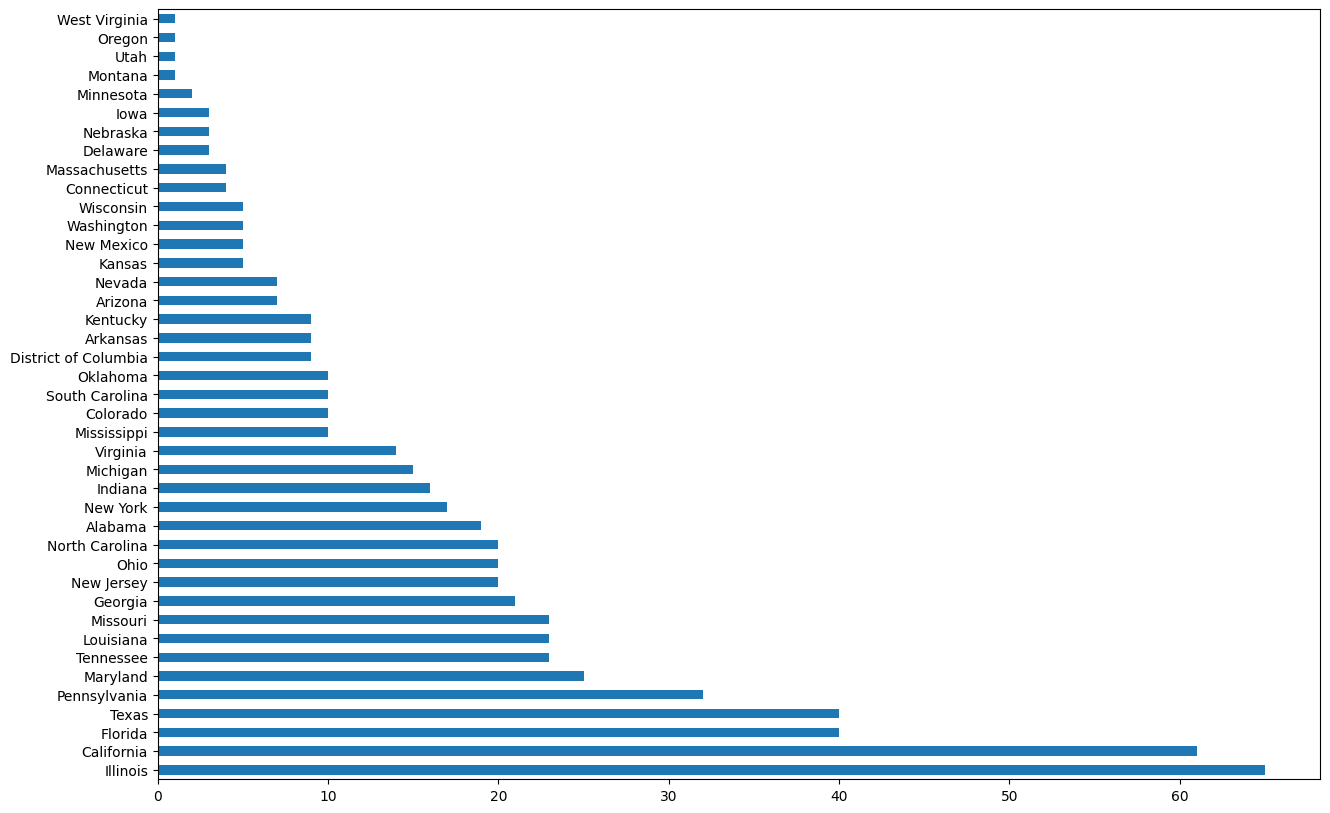

In [367]:
# Answer

shootings['State'].value_counts().plot(kind = 'barh', figsize = (15,10))

# As we can see below, the top three states in terms of number of mass shootings are:
# Illinois, Florida and California.

### Problem 11 - Multi-Step: (10 points)

<span  style="color:purple; font-size:16px">An issue with the previous analysis is that it appears to be the case that more populous states have more mass shootings. We need to fix that. The `../data-sets/pops_by_state.csv` contains 2018 population estimates for US states and regions (you only need the `NAME` and `POPESTIMATE2018` columns). </span>

1. Load this population data into a new DataFrame, `state_population`. 
1. Create another new DataFrame, `shootings_by_state`, containing the counts of mass shooting by state, like you created for the bar graph in Problem 10.
1. Merge `state_population` into `shootings_by_state`. (Hint: convert any Series to a DataFrame for use with `merge()`. This may also involve resetting an index. It is not necessary but it could be easier if you appropriately rename columns before merging.) 
1. Create a new column, `SPP`, for the number of shootings divided by the state population. 
1. Remove all columns from `state_population` except for the column containing the state name and the `SPP` column. 
1. Set the state names to be the index. 
1. Sort the values in ascending order by `SPP`. 
1. Re-create the bar plot with the new variable `SPP`.

<span  style="color:purple; font-size:16px">What are the top 3 states in terms of the number of mass shootings per person? Any state/regions really stand out?</span>

In [368]:
# Answer - prepare df1

state_population = pd.read_csv(r'C:\Users\malab\OneDrive\Documents\Systems and Technologies; Python\ST-Python 64502\ST-Python 64502\notebooks/data-sets/pops_by_state.csv', usecols = ['NAME','POPESTIMATE2018']).rename(columns = {'NAME':'State'})
state_population.head()

,State,POPESTIMATE2018
0,United States,327167434
1,Northeast Region,56111079
2,Midwest Region,68308744
3,South Region,124753948
4,West Region,77993663


In [369]:
# Answer - prepare df2

shootings_by_state = shootings['State'].value_counts().to_frame().reset_index().rename(columns = {'index':'State','State':'Total'})
shootings_by_state.head(5)

,State,Total
0,Illinois,65
1,California,61
2,Florida,40
3,Texas,40
4,Pennsylvania,32


In [370]:
# Answer - Merge

state_population = state_population.merge(shootings_by_state,
                                         how = 'right',
                                         on = 'State')
state_population.head()

,State,POPESTIMATE2018,Total
0,Illinois,12741080,65
1,California,39557045,61
2,Florida,21299325,40
3,Texas,28701845,40
4,Pennsylvania,12807060,32


In [371]:
# Answer - Create new var, drop vars, set index, sort, and plot

state_population['SPP'] = state_population['Total']/state_population['POPESTIMATE2018']
state_population2 = state_population.drop(["POPESTIMATE2018", "Total"], axis = 1)
state_population3 = state_population2.set_index('State')
state_population3.head(5)

,SPP
State,
Illinois,0.000005
California,0.000002
Florida,0.000002
Texas,0.000001
Pennsylvania,0.000002


### Problem 12: (10 points)

<span  style="color:purple; font-size:16px">Using the `shootings` data, create a scatterplot of the number `Injured`(as the x-variable) and the number killed `Dead` (as the y-variable).</span>

<span  style="color:purple; font-size:16px">Do you see any unusual patterns? How would you describe the relationship between the number injured in a shooting and the number killed in a shooting? (Use `alpha = 0.2` to better see the observations.)</span>

<AxesSubplot: xlabel='Injured', ylabel='Dead'>

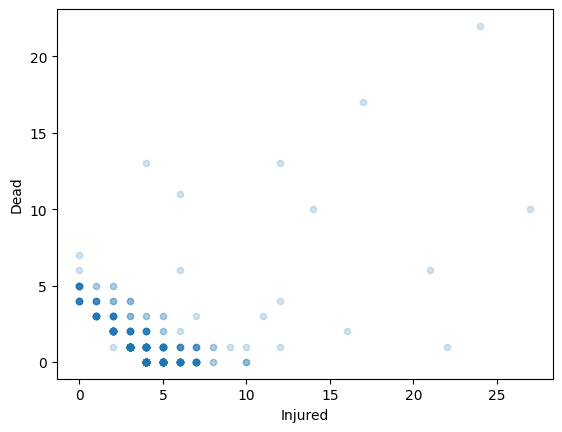

In [372]:
# Answer

shootings.plot(kind = 'scatter', 
              x = 'Injured',
              y = 'Dead',
              alpha = 0.2)

# I would describe the relationship between the number injured and the number killed
# in a shooting as a inverse relationship. That is, as the number of those killed
# in a shooting goes up, the number of those injured in a shooting appears to go
# down and vice versa. We can say that the two are negatively correlated. 

### Problem 13: (10 points)

<span  style="color:purple; font-size:16px">It has been noted that mass-shootings tend to spike during times of extreme heat, particularly in urban areas. The goal of this exercise is to create a horizontal bar graph of the number of shootings by (`<month> <year>`), ordered from most to fewest, to explore the plausibility of this fact. Create this plot by using `str.replace()` to remove everything except the month and year from the `Date` column instead of using any time-series methods. For example: `August 4, 2018` becomes `August 2018`</span>

<span  style="color:purple; font-size:16px">Does the plot seem to suggest that there may be a correlation between temperature and number of mass shootings? What other confounding variables might explain the relationship? (Postulate an explanation, there is not a *right* answer.)</span>

C:\Users\malab\AppData\Local\Temp\ipykernel_2092\2535788771.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  shootings['Date'] = shootings['Date'].str.replace('[0-9]+,','')


<AxesSubplot: >

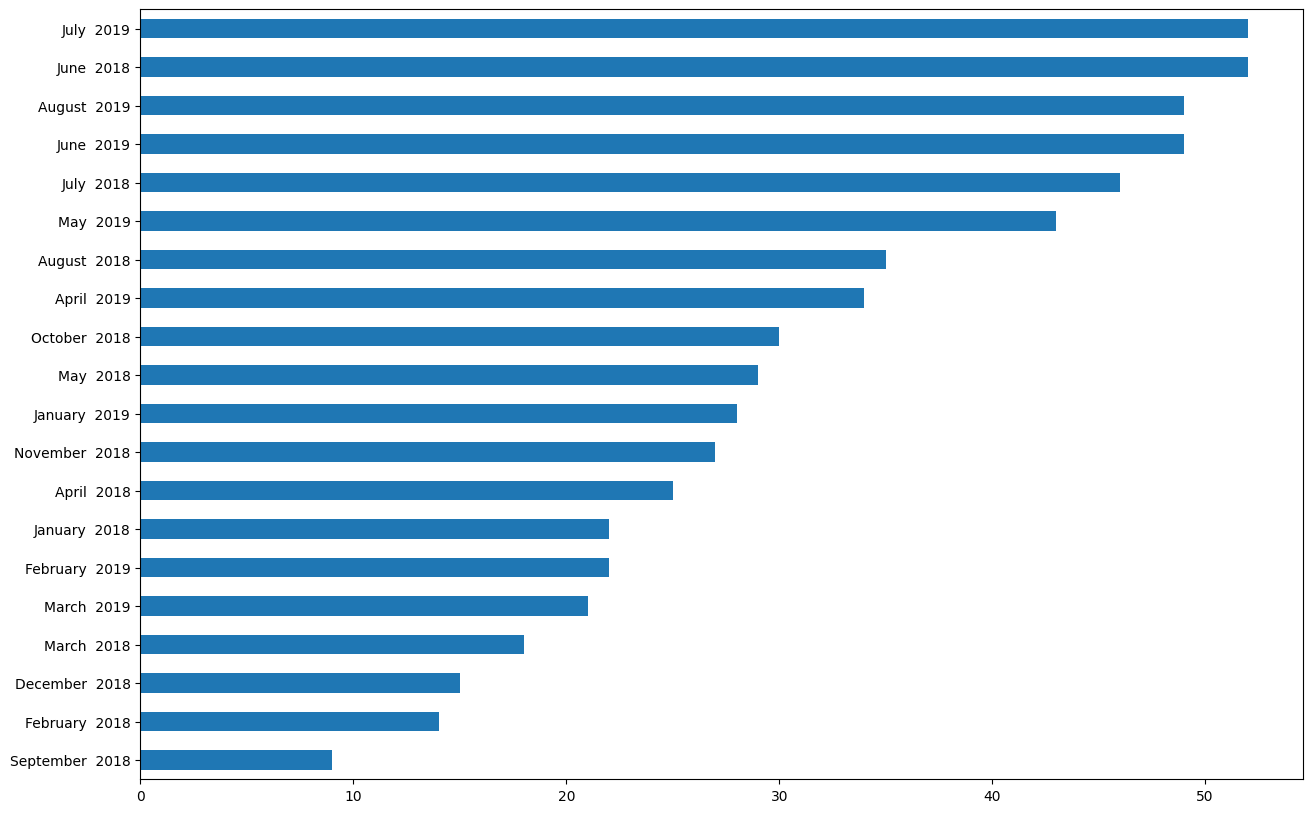

In [383]:
# Answer

shootings['Date'] = shootings['Date'].str.replace('[0-9]+,','')
shootings['Date'].value_counts().sort_values(ascending=True).plot(kind='barh',
              figsize = (15,10))

# The plot tells us that there were certainly more shootings in 2019 than 2018. 
# Although there are certainly anomolies, the data seems to indicate that the 
# number of mass shootings has increased from month to month. 

### Problem 14: (10 points)

<span  style="color:purple; font-size:16px">Create a new DataFrame `family_shootings` containing all observations where the shooting involved a family member (brother, sister, mother, father, son, daughter, aunt, uncle) or significant other (spouse, girlfriend, boyfriend, fiancee). How many shootings make reference to a family member?</span>

<span  style="color:purple; font-size:16px">Note: we need to be careful with 'son' since many words contain this string like the word 'person'. Make use of a word boundary `\b` to eliminate this problem.</span>

In [388]:
# Answer

family_shootings = shootings[shootings['Description'].str.contains
                             (pat = 'brother|sister|mother|father|\bson\b|daughter|aunt|uncle|spouse|girlfriend|boyfriend|fiancee')]
family_shootings.shape[0]


25

### Problem 15: (10 points)

<span  style="color:purple; font-size:16px">List all shootings involving a suicide. What proportion of family shootings involved the shooter committing suicide?</span>

In [393]:
# Answer

suicide_shootings = shootings[shootings['Description'].str.contains(pat = 'suicide')]
suicide_shootings.head(10)
both_shootings = pd.concat([suicide_shootings, family_shootings],
                           axis = 'columns',
                           join = 'inner')
both_shootings.shape[0]/family_shootings.shape[0]

# 28% of family shootings involved the shooter committing suicide!

0.28

## The Outro

Good job for making it through this relatively difficult assignment about such a depressing subject. Uncomment the following cell to create a wordcloud, a visualization useful for getting the gist of some of the important ideas/words in a body of text.

In [396]:
# IMPORTANT NOTE: The AWS Workspace may not already have the wordcloud library
# installed. If not, uncomment the line below to install it into your python kernal
# Do not erase the ! in front of the command below

!pip install wordcloud


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


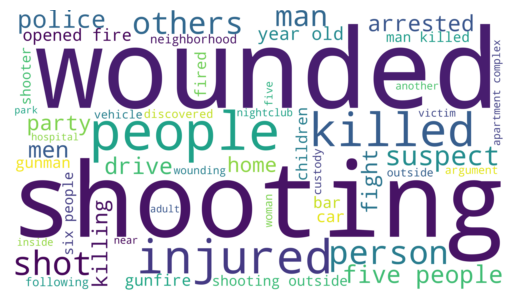

In [397]:
# Import the necessary libraries

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# # Join the reviews together in one long string using a comprehension
text = " ".join(description for description in shootings['Description'].str.lower())

# # Get rid of unimformative words
stopwords = set(STOPWORDS)
stopwords.update(["one", "two", "three", "four"])

# # Create and generate a word cloud image:
# # Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, 
                     background_color="white",
                     normalize_plurals = True,
                     max_words = 50,
                     width=3500,
                     height = 2000).generate_from_text(text)

# # Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()